Output()

425664.0


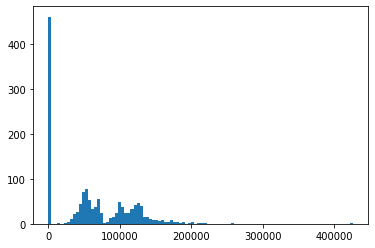

In [1]:
import pandas as pd
from rich.progress import Progress
import sys


fname = "three_months_2021_far_off.csv" 

num_lines = sum(1 for line in open(fname))

with Progress() as progress:

    task = progress.add_task("[red]Loading data...", total=num_lines)

    while not progress.finished:
        data = {}
        row_num = 1 
        with open(fname) as f:
            for row in f:
                progress.update(task, advance=1, refresh=True)
                
                listed = row.strip().split(",")[1:-1]
                if row_num == 1: 
                    sensors = list(listed[1:])
                elif row_num == 2: 
                    var = list(listed[1:])
                elif row_num == 3:
                    dates = list(listed[1:])
                else:
                    time_ = listed[0]
                    if time_ == "Noon":
                        time_ = "12:00 PM"
                    
                    for count, element in enumerate (listed[1:]): 
                        if element == "":
                            val = -100000
                        else: 
                            val = float(element)
                            
#                         data[sensors[count], var[count], dates[count], time_] = element
#                         data[(pd.to_datetime(dates[count] + "T" + time_) - pd.to_datetime(dates[count] + "T12:00 AM")).total_seconds() // 300] = element                      
                        
                        key = (sensors[count], var[count], dates[count])
                        if key in data:
                            data[key].append(val)
                        else:
                            data[key] = [val] 
                            
                row_num += 1
    
m = -1 
s_list = []
for key in data:
    if sum(data[key]) > m:
        m = sum(data[key])
    s_list.append(sum(data[key]))


import matplotlib.pyplot as plt     
plt.hist(s_list, 100)
print (m)

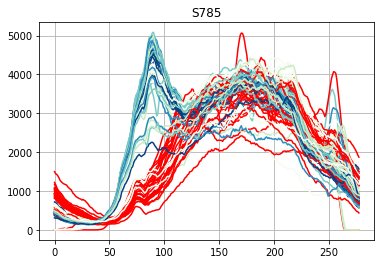

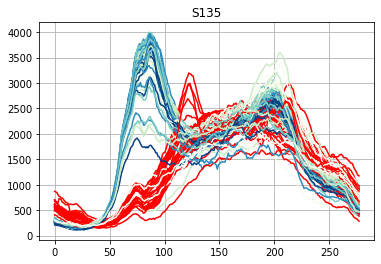

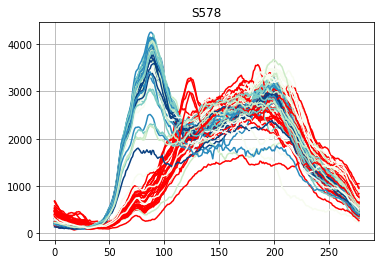

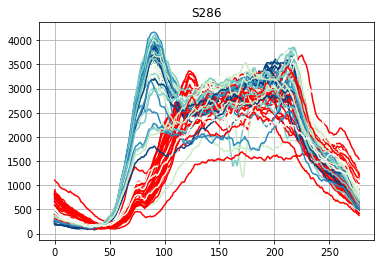

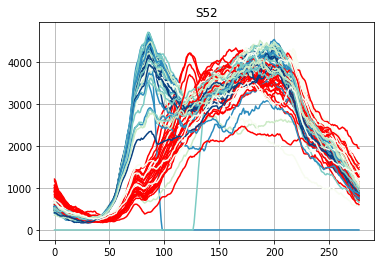

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib

cmap = matplotlib.cm.get_cmap('GnBu_r')



for sensorid in ["S785", "S135", "S578", "S286", "S52"]:
    for key in data:
        sensor, var, date_ = key
        if var == "Volume" and sensor == sensorid:
            if pd.to_datetime(date_).dayofweek <= 4:
                color = cmap(pd.to_datetime(date_).dayofweek/4)
            else:
                color = "Red"
            plt.plot(np.convolve(data[sensor, var, date_], [1] * 10, "valid"), label = sensor + "_" + date_, color = color, alpha=1)
#     plt.legend()
    plt.grid()
    plt.title(sensorid)
    plt.show()


import pickle
with open("data_processed_three_months.pickle", "wb") as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
pd.to_datetime(date_).dayofweek

4

In [4]:
(pd.to_datetime("11:55 PM") - pd.to_datetime("12:00 AM")).total_seconds() // 300

287.0